In [1]:
import tensorflow 

In [18]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.models import  Sequential
import keras
from keras.callbacks import  EarlyStopping

In [4]:
(x_train,y_train), (x_test,y_test)=cifar10.load_data()

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [31]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

c:\Users\prithvi\OneDrive\drive\OneDrive\Documents\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [34]:
#early_stopping = EarlyStopping(monitor='val_loss',patience=5)

model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3444 - loss: 1.7703 - val_accuracy: 0.5481 - val_loss: 1.2650
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5699 - loss: 1.2117 - val_accuracy: 0.6022 - val_loss: 1.1153
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6324 - loss: 1.0326 - val_accuracy: 0.6250 - val_loss: 1.0565
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6730 - loss: 0.9292 - val_accuracy: 0.6801 - val_loss: 0.9317
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7000 - loss: 0.8450 - val_accuracy: 0.6891 - val_loss: 0.9037
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7199 - loss: 0.8006 - val_accuracy: 0.6797 - val_loss: 0.9244
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7367 - loss: 0.7499 - val_accuracy: 0.7018 - val_loss: 0.8590
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7586 -

In [42]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f"test_loss= {test_loss}\n test_acc= {tesr_acc}")

313/313 - 2s - 5ms/step - accuracy: 0.7044 - loss: 0.8853
test_loss= 0.8852918148040771
 test_acc= 0.7044000029563904


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    rescale= 1/255,
    rotation_range=10,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
import matplotlib.pyplot as plt

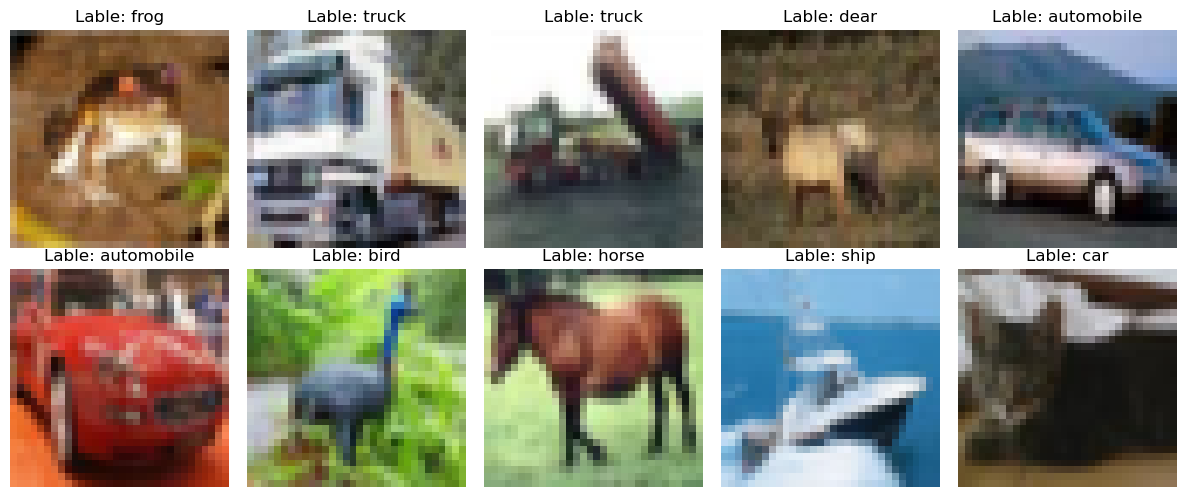

In [15]:
import numpy as np

classes = ['airplane','automobile','bird','car','dear',
           'dog','frog','horse','ship','truck']


def plot_sample_images(x,y,classes,samples=10):
    plt.figure(figsize=(12,5))
    for i in range(samples):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.title(f"Lable: {classes[y[i][0]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    
plot_sample_images(x_train,y_train,classes)
        

In [69]:
x_train.shape

(50000, 32, 32, 3)

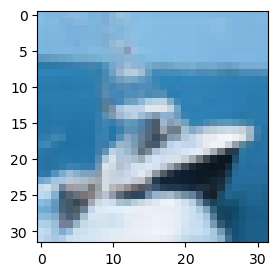

In [16]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[8])